In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as optimise

In [3]:
proton_raw = np.loadtxt('Víz.dat', skiprows=7)

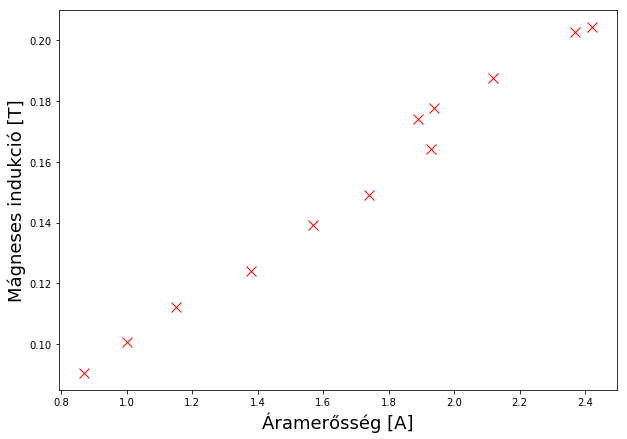

In [21]:
plt.figure(figsize=(10,7))
plt.xlabel('Áramerősség [A]', fontsize = 18)
plt.ylabel('Mágneses indukció [T]', fontsize = 18)

plt.plot(proton_raw[:, 3], proton_raw[:, 4]*3.35/1000, 'x', ms=10, color='red')
plt.savefig('hiszterezis.png')

In [153]:
B= (proton_raw[:, 4]-0.5)*3.35/1000

err_per_kocka = (5.667-5.633)/5.667/2
err_per_kocka * 0.3

0.000899947061937528

In [154]:
z=np.array([1.15, 0.83, .5, 0.32, .22,  0.1])
dB_z_kocka=np.array([0., .4, .2, -0.6, -1.2, -2.7])
dB_z = dB_z_kocka * err_per_kocka
dB_z

array([ 0.        ,  0.00119993,  0.00059996, -0.00179989, -0.00359979,
       -0.00809952])

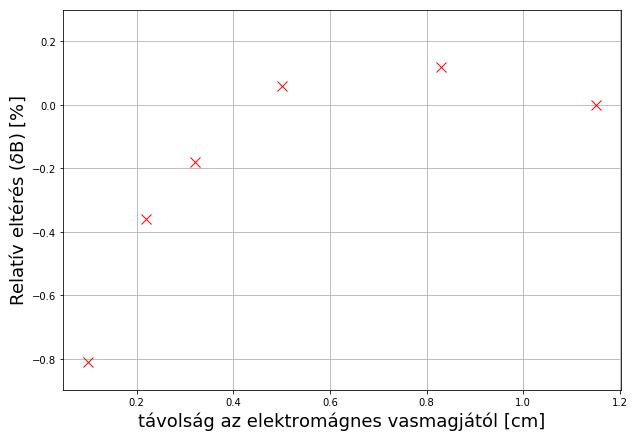

In [155]:
plt.figure(figsize=(10,7))
plt.xlabel('távolság az elektromágnes vasmagjától [cm]', fontsize = 18)
plt.ylabel('Relatív eltérés ($\delta$B) [%]', fontsize = 18)
plt.ylim([-0.9, 0.3])
plt.plot(z, dB_z*100, 'x', ms=10, color='red')
plt.grid(True)
plt.savefig('../inhom.png')

In [167]:
B_err_rel = np.sqrt((0.5/proton_raw[:, 4])**2 + 0.0015**2 + 0.0018**2 + 0.0006**2)
f=proton_raw[:,1]
f

array([8.496, 8.325, 7.705, 7.285, 7.155, 6.754, 6.167, 5.641, 5.087,
       4.515, 4.064, 3.675])

In [168]:
print('Frekvencia [MHz] & B [mT] \\\\ \hline \hline \n')
for i in range(B.shape[0]):
    print('$ {2:.3f}\pm 0.0005 $&${0:.1f}\pm {1:.1f} $  \\\\ \hline \n'.format(B[i]*1000, B[i]* B_err_rel[i]*1000,f[i]))

Frekvencia [MHz] & B [mT] \\ \hline \hline 

$ 8.496\pm 0.0005 $&$202.7\pm 1.7 $  \\ \hline 

$ 8.325\pm 0.0005 $&$201.0\pm 1.7 $  \\ \hline 

$ 7.705\pm 0.0005 $&$185.9\pm 1.7 $  \\ \hline 

$ 7.285\pm 0.0005 $&$175.9\pm 1.7 $  \\ \hline 

$ 7.155\pm 0.0005 $&$172.5\pm 1.7 $  \\ \hline 

$ 6.754\pm 0.0005 $&$162.5\pm 1.7 $  \\ \hline 

$ 6.167\pm 0.0005 $&$147.4\pm 1.7 $  \\ \hline 

$ 5.641\pm 0.0005 $&$137.3\pm 1.7 $  \\ \hline 

$ 5.087\pm 0.0005 $&$122.3\pm 1.7 $  \\ \hline 

$ 4.515\pm 0.0005 $&$110.5\pm 1.7 $  \\ \hline 

$ 4.064\pm 0.0005 $&$98.8\pm 1.7 $  \\ \hline 

$ 3.675\pm 0.0005 $&$88.8\pm 1.7 $  \\ \hline 



In [169]:
f_err_rel = 0.005/f
f_err_rel

array([0.00058851, 0.0006006 , 0.00064893, 0.00068634, 0.00069881,
       0.0007403 , 0.00081077, 0.00088637, 0.0009829 , 0.00110742,
       0.00123031, 0.00136054])

In [172]:
f_mine=f[2::3]
B_mine=B[2::3]
B_err=B[2::3] * B_err_rel[2::3]

#f_mine=f
#B_mine=B
#B_err=B*B_err_rel

def lin(x, A, B):
    return A*x+B
def linA(x, A):
    return x*A

params, cov = optimise.curve_fit(linA, f_mine, B_mine)
params, cov = optimise.curve_fit(linA, f_mine, B_mine, p0=params)
linerr=np.sqrt(np.diag(cov))
print(params)
print(linerr)

[0.0240926]
[2.54932729e-05]


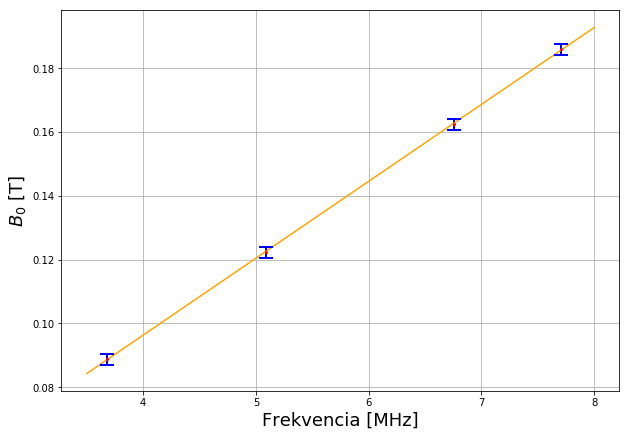

In [173]:
plt.figure(figsize=(10,7))
plt.xlabel('Frekvencia [MHz]', fontsize = 18)
plt.ylabel('$B_0$ [T]', fontsize = 18)
plt.plot(np.linspace(3.5, 8., 1120), linA(np.linspace(3.5, 8., 1120), *params), color='orange')
plt.plot(f[2::3], B[2::3], ".", ms=4, color ='red')
plt.errorbar(f[2::3], B[2::3], B[2::3] * B_err_rel[2::3], elinewidth=2, capsize = 7, capthick=2, linewidth=0, color='blue')
plt.grid(True)
plt.savefig('../BF.png')


In [174]:
params/1000000

array([2.40925953e-08])

In [177]:
prot = np.array([4.996, 7.150])
fluor = np.array([4.697, 6.726])
prot_err = np.array([.001, .001])
fluor_err = np.array([.0034, .0034])
B_err = np.array([.0020, .0020])
g_rat = fluor/prot
g_err = np.sqrt((prot_err/prot)**2 + (fluor_err/fluor)**2 + B_err**2)*g_rat
print(g_rat)
print(g_err)

[0.94015212 0.9406993 ]
[0.00200851 0.00194502]


In [188]:
def const(x, A):
    return A

params, cov =optimise.curve_fit(const, np.array([1., 2.]), g_rat)
params, cov =optimise.curve_fit(const, np.array([1., 2.]), g_rat, sigma=g_err, p0=params)

err=np.sqrt(np.diag(cov))

print(params)
print(err)


[0.9404345]
[0.00027345]
